## Lecture 9 – plotly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Installing Plotly:
#!pip install plotly

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go

In [3]:
births = pd.read_csv('baby.csv')

In [4]:
births.head()

Birth Weight  Gestational Days  Maternal Age  Maternal Height  \
0           120               284            27               62   
1           113               282            33               64   
2           128               279            28               64   
3           108               282            23               67   
4           136               286            25               62   

   Maternal Pregnancy Weight  Maternal Smoker  
0                        100            False  
1                        135            False  
2                        115             True  
3                        125             True  
4                         93            False

In [32]:
births.shape

(1174, 6)

## Bar Plots

We often use bar plots to display distributions of a categorical variable:

In [33]:
births['Maternal Smoker'].value_counts()

False    715
True     459
Name: Maternal Smoker, dtype: int64

In [34]:
births['Maternal Smoker'].value_counts().plot(kind = 'bar');

Note: putting a semicolon after a plot call hides all of the unnecessary text that comes after it (the `<matplotlib.axes_....>`).

In [35]:
pd.options.plotting.backend = "plotly"

In [36]:
fig = births['Maternal Smoker'].value_counts().plot(kind = 'bar');
fig.show()

In [37]:
pd.options.plotting.backend = "plotly"

In [38]:
fig = births['Maternal Smoker'].value_counts().plot(kind = 'bar');
fig.update_xaxes(title="Maternal Smoker")
fig.update_yaxes(title="Count")
fig.show()

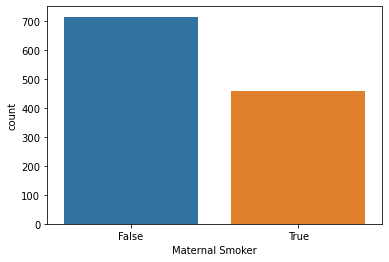

In [39]:
sns.countplot(x=births['Maternal Smoker']);

Or even better:

In [13]:
px.histogram(births, x="Maternal Smoker")

But we can also use them to display a numerical variable that has been measured on individuals in different categories.

In [15]:
# These are made up!
majors = ['Data Science', 'History', 'Biology', 'Business']
gpas = [3.35, 3.20, 2.98, 3.51]

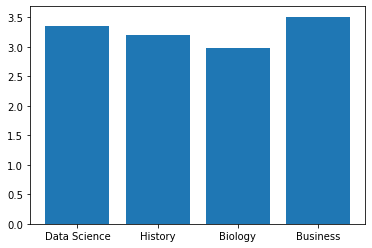

In [42]:
# What if we change bar to barh?
plt.bar(majors, gpas);

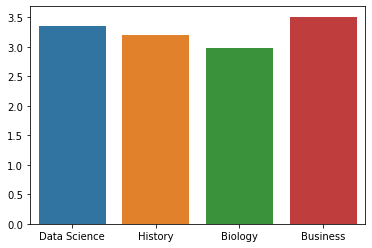

In [43]:
sns.barplot(x=majors, y=gpas);

In [16]:
px.bar(x=majors, y=gpas)

## Rug plots

Used for visualizing a single quantitative variable. Rug plots show us each and every value.

In [45]:
bweights = births["Birth Weight"]

In [46]:
bweights

0       120
1       113
2       128
3       108
4       136
       ... 
1169    113
1170    128
1171    130
1172    125
1173    117
Name: Birth Weight, Length: 1174, dtype: int64

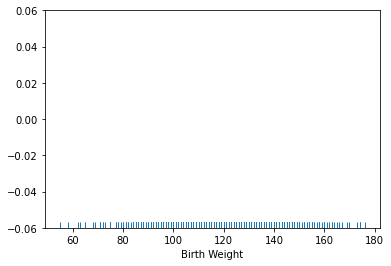

In [47]:
sns.rugplot(bweights);

In [17]:
px.histogram(births, 
             x="Birth Weight", 
             color="Maternal Smoker", 
             hover_data=births.columns,
             marginal="rug")

## Histograms

Our old friend!

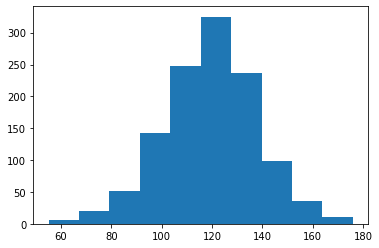

In [49]:
# By default, you get some arbitrary bins. We often like to pick our own.
plt.hist(bweights);

In [50]:
min(bweights), max(bweights)

(55, 176)

In [51]:
bw_bins = range(50, 200, 5)

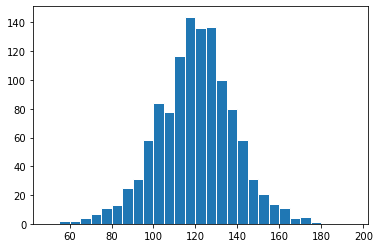

In [52]:
plt.hist(bweights, bins=bw_bins, ec='w');

The above plot shows _counts_, if we want to see a _distribution_ we can use the `density` keyword:

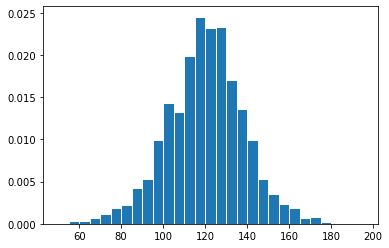

In [53]:
plt.hist(bweights, density=True, bins=bw_bins, ec='w');

In [54]:
pd.options.plotting.backend = "matplotlib"

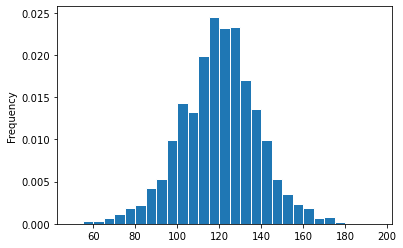

In [55]:
# alternative way of getting this plot
bweights.plot(kind = 'hist', density=True, bins=bw_bins, ec='w');

In [56]:
pd.options.plotting.backend = "plotly"

In [57]:
fig = bweights.plot(kind = 'hist', 
                    histnorm='probability density', 
                    bins=bw_bins);
fig.update_layout(bargap=0.1)
fig.show()

Increasing bin width loses granularity, but this may be fine for our purposes.

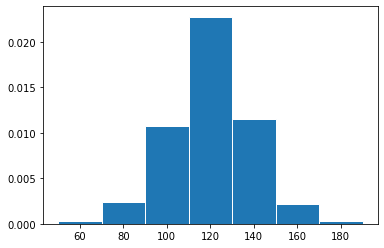

In [58]:
plt.hist(bweights, bins = np.arange(50, 200, 20), density=True, ec='w');

In [59]:
fig = go.Figure(go.Histogram(x=bweights, 
                             histnorm='probability density', 
                             xbins=dict(start=50, end=200, size=20)))
fig.update_layout(bargap=0.1)
# fig

The bin widths don't all need to be the same!

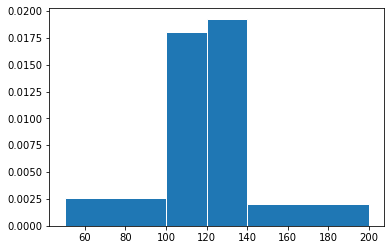

In [60]:
plt.hist(bweights, bins = [50, 100, 120, 140, 200], density=True, ec='w');

## Density Curves

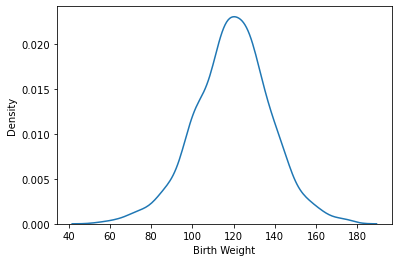

In [61]:
sns.kdeplot(bweights);

Seaborn has [several related functions for plotting distributions](https://seaborn.pydata.org/tutorial/distributions.html): `kdeplot`, `histplot`, `rugplot` and `displot`. The latter is more generic but uses the others under the hood:

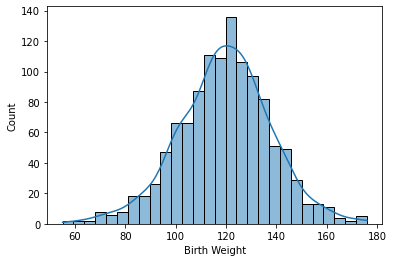

In [62]:
sns.histplot(bweights, kde=True);

Can even show a rugplot with it!

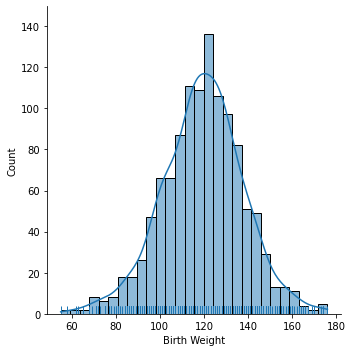

In [63]:
sns.displot(bweights, kde=True, rug=True);

`displot` is quite flexible, so instead of a histogram we can ask it, for example, to show the density curve and rugplot only:

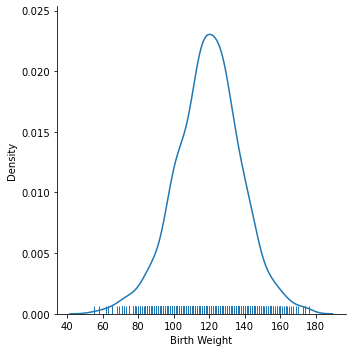

In [64]:
sns.displot(bweights, kind='kde', rug=True);

In [65]:
fig = ff.create_distplot(
    [births["Birth Weight"]],
    group_labels=["Birth Weight"],
    bin_size=2)
fig.update_layout(bargap=0.1)
fig

## Box Plots

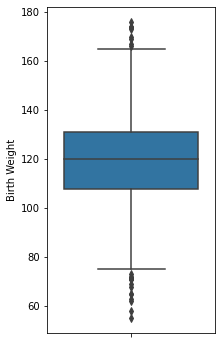

In [66]:
plt.figure(figsize = (3, 6))
sns.boxplot(y=bweights);

In [18]:
px.box(births, y="Birth Weight", x="Maternal Smoker")

In [68]:
q1 = np.percentile(bweights, 25)
q2 = np.percentile(bweights, 50)
q3 = np.percentile(bweights, 75)
iqr = q3 - q1
whisk1 = q1 - 1.5*iqr
whisk2 = q3 + 1.5*iqr

whisk1, q1, q2, q3, whisk2

(73.5, 108.0, 120.0, 131.0, 165.5)

## Violin Plots

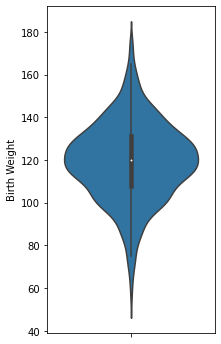

In [69]:
plt.figure(figsize = (3, 6))
sns.violinplot(y=bweights);

In [70]:
px.violin(births, y="Birth Weight", x="Maternal Smoker")

## Overlaid Histograms and Density Curves

In [71]:
births.head()

Birth Weight  Gestational Days  Maternal Age  Maternal Height  \
0           120               284            27               62   
1           113               282            33               64   
2           128               279            28               64   
3           108               282            23               67   
4           136               286            25               62   

   Maternal Pregnancy Weight  Maternal Smoker  
0                        100            False  
1                        135            False  
2                        115             True  
3                        125             True  
4                         93            False

In [72]:
sm_bweights = births[births['Maternal Smoker'] == True]['Birth Weight']
nsm_bweights = births[births['Maternal Smoker'] == False]['Birth Weight']

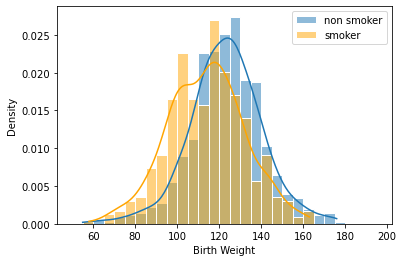

In [73]:
sns.histplot(nsm_bweights, bins=bw_bins, kde=True, stat='density', label='non smoker', ec='w');
sns.histplot(sm_bweights, bins=bw_bins, kde=True, stat='density', label='smoker', color='orange', ec='w');
plt.legend();

In [74]:
fig = ff.create_distplot(
    [births.query("`Maternal Smoker` == True")['Birth Weight'],
     births.query("`Maternal Smoker` == False")['Birth Weight']],
    ["Smoker", "Non-Smoker"], 
    bin_size=2)
fig.update_layout(bargap=0.1)
fig

## Side by side box plots and violin plots

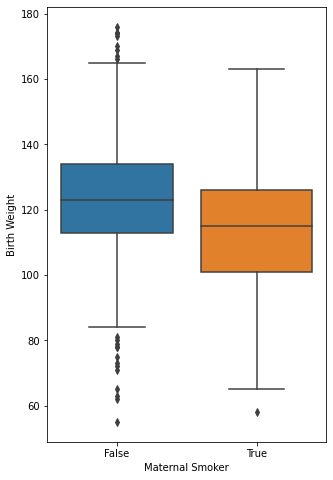

In [75]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=births, x = 'Maternal Smoker', y = 'Birth Weight');

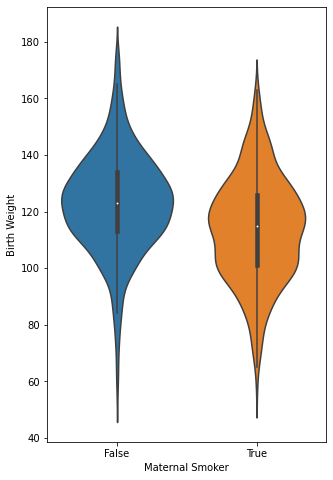

In [76]:
plt.figure(figsize=(5, 8))
sns.violinplot(data=births, x = 'Maternal Smoker', y = 'Birth Weight');

A less fancy version of the above two plots:

In [77]:
two_distributions = [nsm_bweights.values, sm_bweights.values]
groups = ['non-smokers', 'smokers']

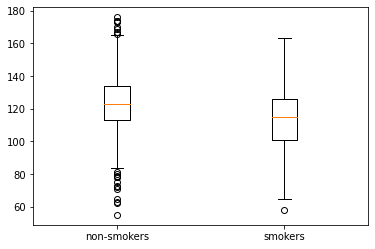

In [78]:
plt.boxplot(two_distributions, labels=groups);

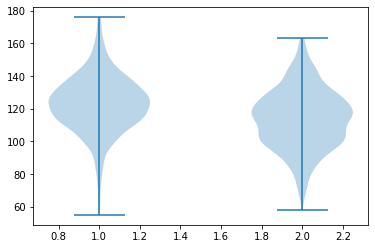

In [79]:
plt.violinplot(two_distributions);

## Scatter plots

In [80]:
births.head()

Birth Weight  Gestational Days  Maternal Age  Maternal Height  \
0           120               284            27               62   
1           113               282            33               64   
2           128               279            28               64   
3           108               282            23               67   
4           136               286            25               62   

   Maternal Pregnancy Weight  Maternal Smoker  
0                        100            False  
1                        135            False  
2                        115             True  
3                        125             True  
4                         93            False

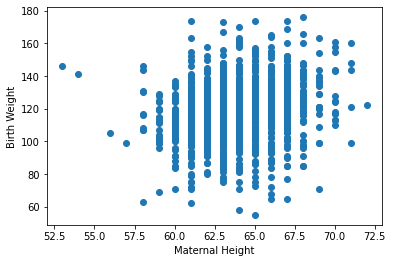

In [5]:
plt.scatter(births['Maternal Height'], births['Birth Weight']);
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');

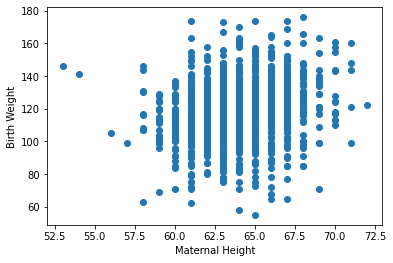

In [82]:
plt.scatter(data=births, x='Maternal Height', y='Birth Weight');
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');

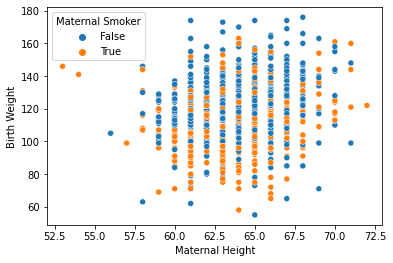

In [83]:
sns.scatterplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue = 'Maternal Smoker');

In [19]:
px.scatter(births, 
           x = 'Maternal Height', 
           y = 'Birth Weight', 
           color = 'Maternal Smoker')

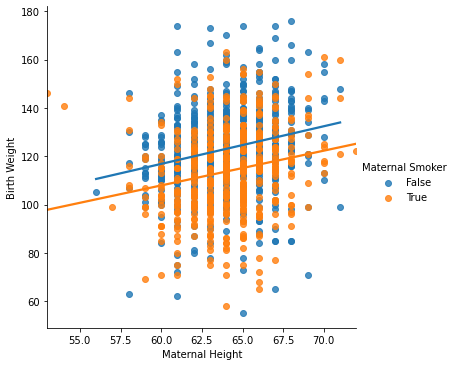

In [85]:
sns.lmplot(data = births, x = 'Maternal Height', y = 'Birth Weight', ci=False, hue='Maternal Smoker');

In [86]:
fig = px.scatter(births, 
                 x = 'Maternal Height', 
                 y = 'Birth Weight', 
                 color = 'Maternal Smoker',
                 trendline = "ols")
fig

In [87]:
results = px.get_trendline_results(fig)
for (_, i, t) in results.itertuples():
    print("Maternal Smoker = ", i)
    print(t.summary())
    print("\n\n")

Maternal Smoker =  False
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     36.83
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           2.09e-09
Time:                        09:35:21   Log-Likelihood:                -3039.4
No. Observations:                 715   AIC:                             6083.
Df Residuals:                     713   BIC:                             6092.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.2573     1

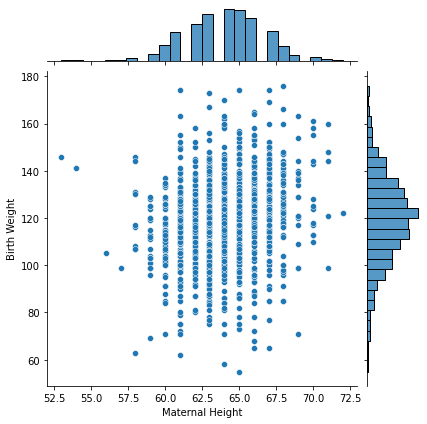

In [88]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight');

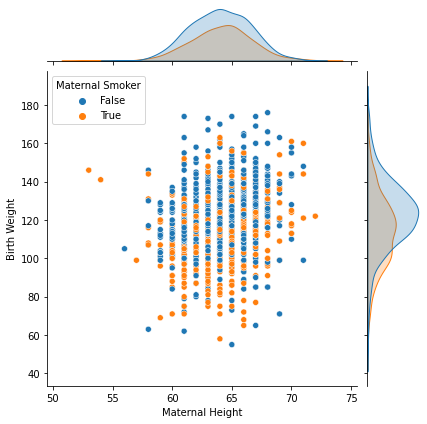

In [89]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue='Maternal Smoker');

## Hex plots and contour plots

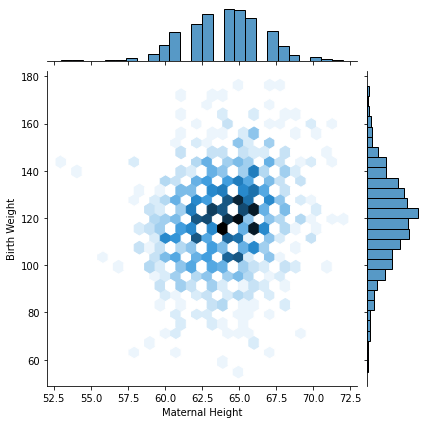

In [10]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight',kind='hex');

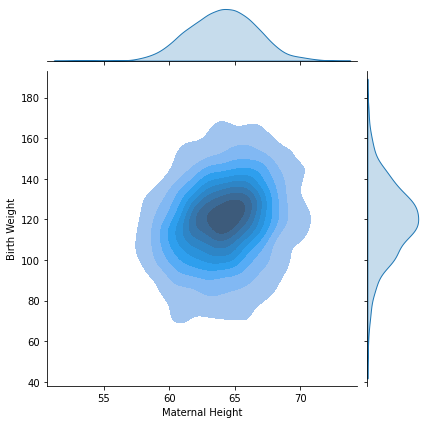

In [91]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind='kde', fill=True);

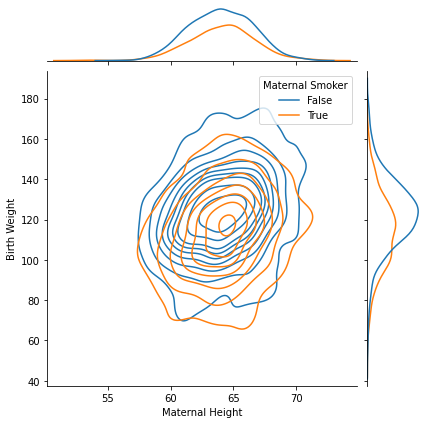

In [12]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind='kde', hue='Maternal Smoker');

In [20]:
fig = px.scatter(births, x = 'Maternal Height', y = 'Birth Weight')
fig.data

(Scattergl({
     'hovertemplate': 'Maternal Height=%{x}<br>Birth Weight=%{y}<extra></extra>',
     'legendgroup': '',
     'marker': {'color': '#636efa', 'symbol': 'circle'},
     'mode': 'markers',
     'name': '',
     'showlegend': False,
     'x': array([62, 64, 64, ..., 65, 65, 65]),
     'xaxis': 'x',
     'y': array([120, 113, 128, ..., 130, 125, 117]),
     'yaxis': 'y'
 }),)

In [21]:
fig = px.density_contour(births, 
                         x = 'Maternal Height', 
                         y = 'Birth Weight', 
                         color ='Maternal Smoker',
                         marginal_x="histogram", 
                         marginal_y="histogram")
fig.add_traces(px.scatter(
    births, x = 'Maternal Height', y = 'Birth Weight', 
    color ='Maternal Smoker').data)

## Bonus

Calling `.plot()` results in weird things!